In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib


In [2]:
# Cargar los datos
Datos = pd.read_csv(r"C:\Proyectos\Proyectos_IA\Calidad_del_sueño\Health and Sleep stadistics\Health_Sleep_Statistics.csv")


In [3]:
#Ver datos columnas
print(Datos.columns.tolist())

['User ID', 'Age', 'Gender', 'Sleep Quality', 'Bedtime', 'Wake-up Time', 'Daily Steps', 'Calories Burned', 'Physical Activity Level', 'Dietary Habits', 'Sleep Disorders', 'Medication Usage']


In [4]:
# Visualización de datos antes de la manipulación
print("\nVista previa de los datos originales:")
print(Datos.head())


Vista previa de los datos originales:
   User ID  Age Gender  Sleep Quality Bedtime Wake-up Time  Daily Steps  \
0        1   25      f              8   23:00        06:30         8000   
1        2   34      m              7   00:30        07:00         5000   
2        3   29      f              9   22:45        06:45         9000   
3        4   41      m              5   01:00        06:30         4000   
4        5   22      f              8   23:30        07:00        10000   

   Calories Burned Physical Activity Level Dietary Habits Sleep Disorders  \
0             2500                  medium        healthy              no   
1             2200                     low      unhealthy             yes   
2             2700                    high        healthy              no   
3             2100                     low      unhealthy             yes   
4             2800                    high         medium              no   

  Medication Usage  
0               no  
1    

In [5]:
print("\nInformación general:")
print(Datos.info())


Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User ID                  100 non-null    int64 
 1   Age                      100 non-null    int64 
 2   Gender                   100 non-null    object
 3   Sleep Quality            100 non-null    int64 
 4   Bedtime                  100 non-null    object
 5   Wake-up Time             100 non-null    object
 6   Daily Steps              100 non-null    int64 
 7   Calories Burned          100 non-null    int64 
 8   Physical Activity Level  100 non-null    object
 9   Dietary Habits           100 non-null    object
 10  Sleep Disorders          100 non-null    object
 11  Medication Usage         100 non-null    object
dtypes: int64(5), object(7)
memory usage: 9.5+ KB
None


In [6]:
# Verificar valores nulos
print("\nValores nulos por columna:")
print(Datos.isnull().sum())


Valores nulos por columna:
User ID                    0
Age                        0
Gender                     0
Sleep Quality              0
Bedtime                    0
Wake-up Time               0
Daily Steps                0
Calories Burned            0
Physical Activity Level    0
Dietary Habits             0
Sleep Disorders            0
Medication Usage           0
dtype: int64


In [7]:
# Renombrar columnas eliminando espacios y guiones
Datos.columns = Datos.columns.str.strip().str.replace(r'[\s-]', '_', regex=True)

In [8]:
# Eliminar columnas innecesarias
Datos = Datos.drop(columns=['User_ID'], errors='ignore')

In [9]:
# Eliminar filas con valores nulos y duplicados
Datos = Datos.dropna().drop_duplicates()

In [10]:
# Convertir Bedtime y Wake-up Time a datetime
Datos['Bedtime'] = pd.to_datetime(Datos['Bedtime'], errors='coerce', format='%H:%M')
Datos['Wake_up_Time'] = pd.to_datetime(Datos['Wake_up_Time'], errors='coerce', format='%H:%M')

In [11]:
# Eliminar filas con NaT en Bedtime o Wake-up Time
Datos = Datos.dropna(subset=['Bedtime', 'Wake_up_Time'])

In [12]:
# Calcular la duración del sueño
Datos['SleepDuration'] = Datos['Wake_up_Time'] - Datos['Bedtime']

In [13]:
# Corregir el caso cuando Wake-up Time es el día siguiente
Datos['SleepDuration'] = Datos['SleepDuration'].apply(lambda x: x if x >= pd.Timedelta(0) else x + pd.Timedelta(days=1))

In [14]:
# Convertir duración del sueño a horas
Datos['SleepDuration_Hours'] = Datos['SleepDuration'].dt.total_seconds() / 3600

In [15]:
# Eliminar columnas de tiempo ya transformadas
Datos = Datos.drop(columns=['Bedtime', 'Wake_up_Time', 'SleepDuration'])

In [16]:

# Codificar variables categóricas
Datos = pd.get_dummies(Datos, columns=["Gender", "Physical_Activity_Level", "Dietary_Habits", "Sleep_Disorders", "Medication_Usage"], drop_first=True)

In [17]:
# Verificar datos después de la manipulación
print("\nVista previa de los datos después de la manipulación:")
print(Datos.head())



Vista previa de los datos después de la manipulación:
   Age  Sleep_Quality  Daily_Steps  Calories_Burned  SleepDuration_Hours  \
0   25              8         8000             2500                  7.5   
1   34              7         5000             2200                  6.5   
2   29              9         9000             2700                  8.0   
3   41              5         4000             2100                  5.5   
4   22              8        10000             2800                  7.5   

   Gender_m  Physical_Activity_Level_low  Physical_Activity_Level_medium  \
0     False                        False                            True   
1      True                         True                           False   
2     False                        False                           False   
3      True                         True                           False   
4     False                        False                           False   

   Dietary_Habits_medium  Dieta

In [18]:
print("\nInformación después de la limpieza:")
print(Datos.info())



Información después de la limpieza:
<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             88 non-null     int64  
 1   Sleep_Quality                   88 non-null     int64  
 2   Daily_Steps                     88 non-null     int64  
 3   Calories_Burned                 88 non-null     int64  
 4   SleepDuration_Hours             88 non-null     float64
 5   Gender_m                        88 non-null     bool   
 6   Physical_Activity_Level_low     88 non-null     bool   
 7   Physical_Activity_Level_medium  88 non-null     bool   
 8   Dietary_Habits_medium           88 non-null     bool   
 9   Dietary_Habits_unhealthy        88 non-null     bool   
 10  Sleep_Disorders_yes             88 non-null     bool   
 11  Medication_Usage_yes            88 non-null     bool   
dtypes: boo

In [19]:
# Comprobar nombres de las columnas
print("Columnas después de la codificación:", Datos.columns.tolist())

Columnas después de la codificación: ['Age', 'Sleep_Quality', 'Daily_Steps', 'Calories_Burned', 'SleepDuration_Hours', 'Gender_m', 'Physical_Activity_Level_low', 'Physical_Activity_Level_medium', 'Dietary_Habits_medium', 'Dietary_Habits_unhealthy', 'Sleep_Disorders_yes', 'Medication_Usage_yes']


Text(0, 0.5, 'Frecuencia')

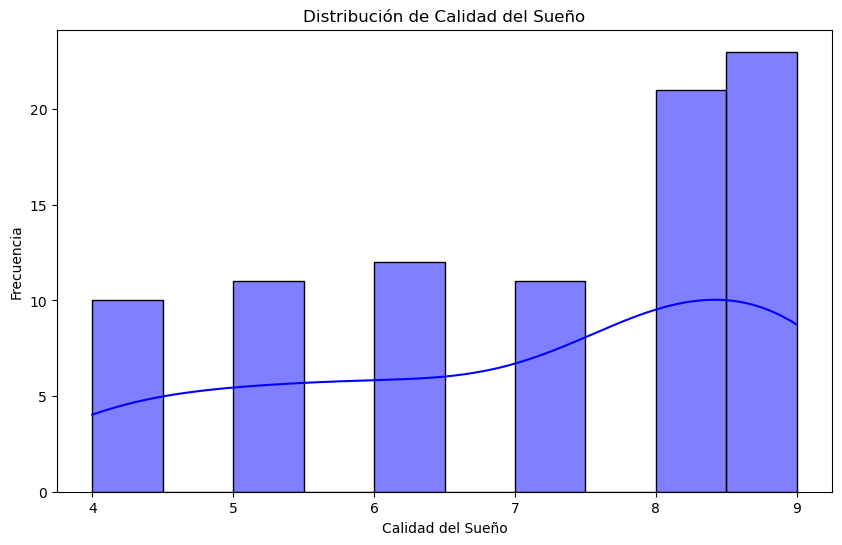

In [20]:
# Comparación de la distribución de la calidad del sueño
plt.figure(figsize=(10, 6))
sns.histplot(Datos['Sleep_Quality'], bins=10, kde=True, color='blue')
plt.title("Distribución de Calidad del Sueño")
plt.xlabel("Calidad del Sueño")
plt.ylabel("Frecuencia")

Text(0, 0.5, 'Frecuencia')

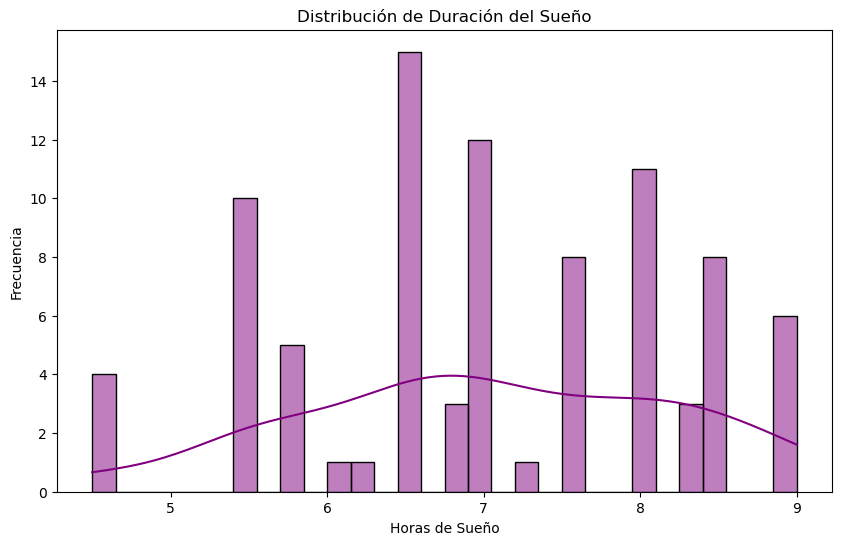

In [21]:
# Comparación de la distribución de duración del sueño
plt.figure(figsize=(10, 6))
sns.histplot(Datos['SleepDuration_Hours'], bins=30, kde=True, color='purple')
plt.title("Distribución de Duración del Sueño")
plt.xlabel("Horas de Sueño")
plt.ylabel("Frecuencia")


Text(0.5, 1.0, 'Matriz de Correlación')

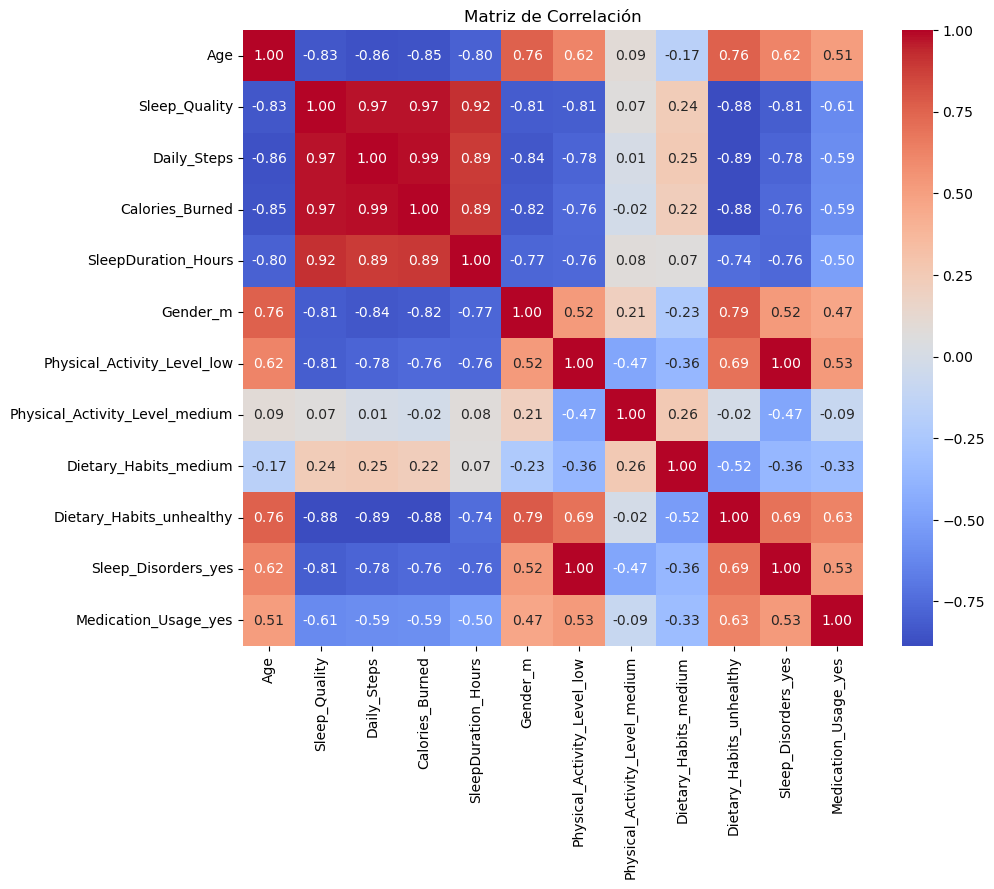

In [22]:
# Matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(Datos.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")

Text(0.5, 1.0, 'Distribución de Pasos Diarios según la Edad')

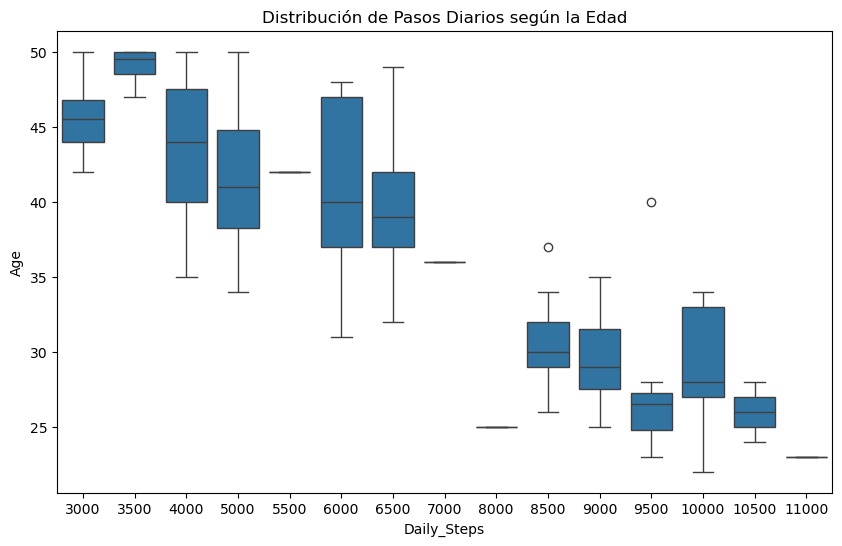

In [23]:
# Boxplot: Pasos diarios vs Edad
plt.figure(figsize=(10, 6))
sns.boxplot(x=Datos['Daily_Steps'], y=Datos['Age'])
plt.title("Distribución de Pasos Diarios según la Edad")

Text(0, 0.5, 'Frecuencia')

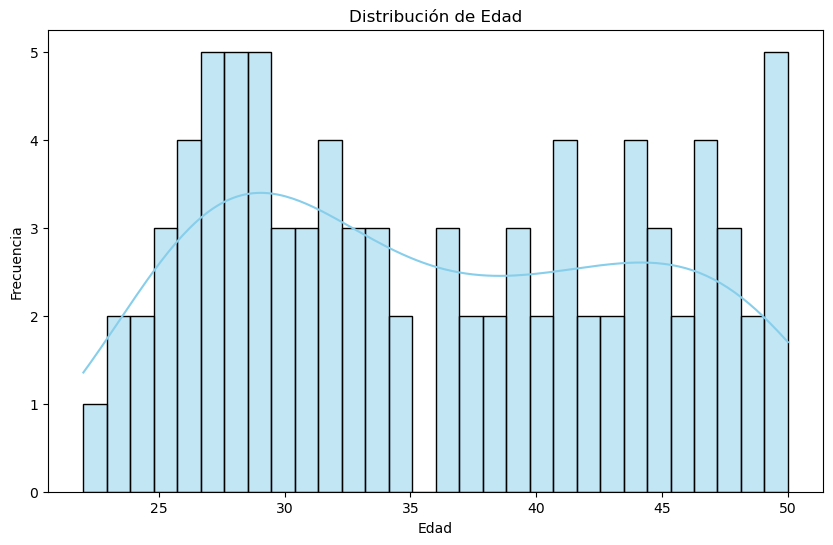

In [24]:
# Distribución de Edad
plt.figure(figsize=(10, 6))
sns.histplot(Datos['Age'], bins=30, kde=True, color='skyblue')
plt.title("Distribución de Edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")

Text(0, 0.5, 'Edad')

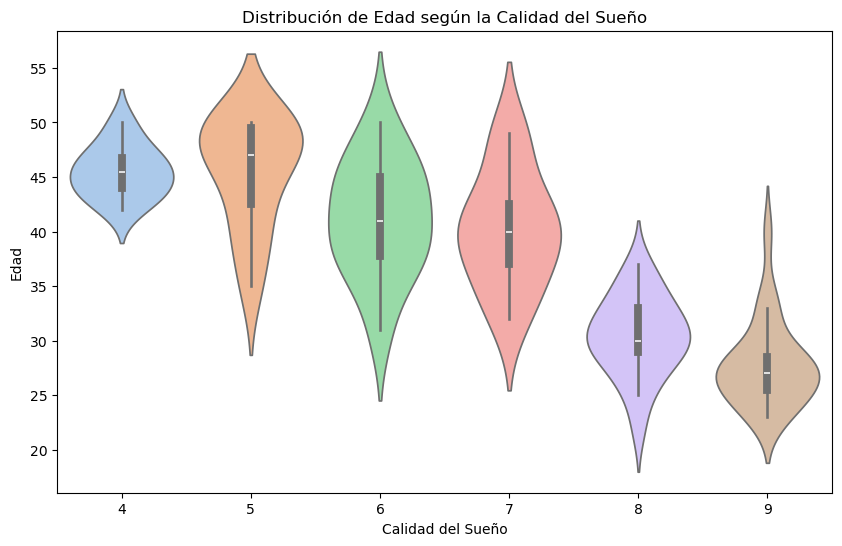

In [25]:
# Relación entre Edad y Calidad del Sueño
plt.figure(figsize=(10, 6))
sns.violinplot(x=Datos['Sleep_Quality'], y=Datos['Age'], hue=Datos['Sleep_Quality'].astype(str), palette='pastel')
plt.title("Distribución de Edad según la Calidad del Sueño")
plt.xlabel("Calidad del Sueño")
plt.ylabel("Edad")

Text(0, 0.5, 'Calidad del Sueño')

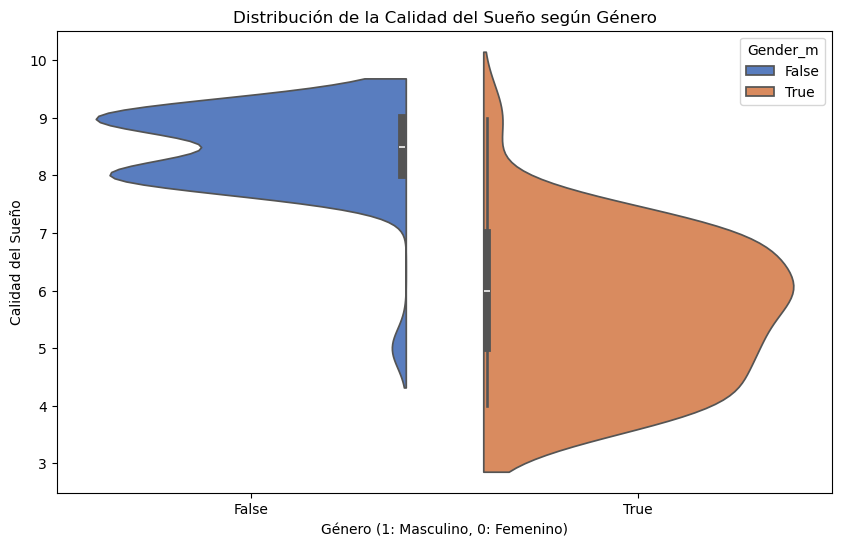

In [26]:
# Gráfico de violín: Calidad del sueño por Género
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender_m', y='Sleep_Quality', data=Datos, hue='Gender_m', palette='muted', split=True)
plt.title("Distribución de la Calidad del Sueño según Género")
plt.xlabel("Género (1: Masculino, 0: Femenino)")
plt.ylabel("Calidad del Sueño")

Text(0, 0.5, 'Calidad del Sueño')

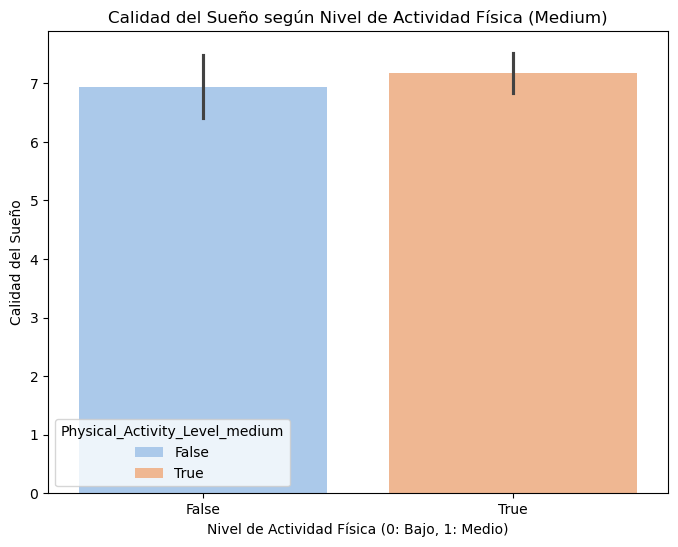

In [27]:
# Gráfico de barras: Calidad del sueño por Nivel de Actividad Física
plt.figure(figsize=(8, 6))
sns.barplot(x='Physical_Activity_Level_medium', y='Sleep_Quality', data=Datos, hue='Physical_Activity_Level_medium', palette='pastel')
plt.title("Calidad del Sueño según Nivel de Actividad Física (Medium)")
plt.xlabel("Nivel de Actividad Física (0: Bajo, 1: Medio)")
plt.ylabel("Calidad del Sueño")

Text(0, 0.5, 'Duración del Sueño (Horas)')

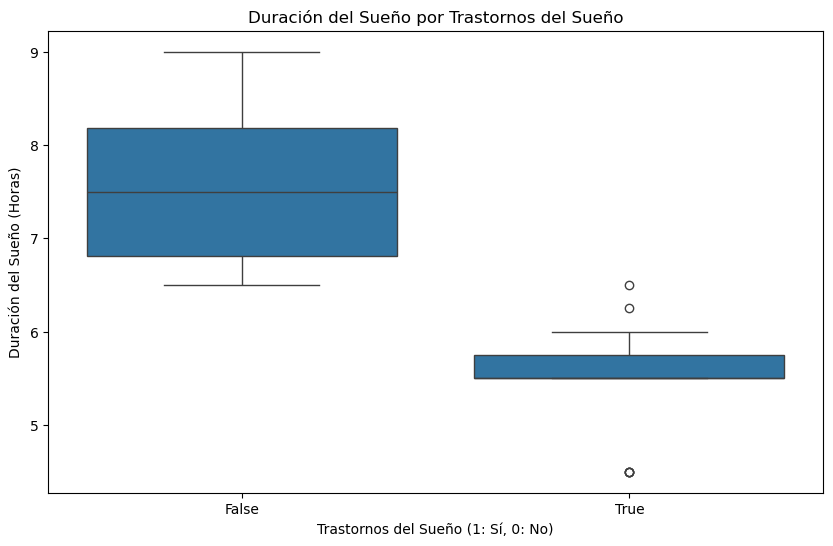

In [28]:
# Boxplot: Duración del Sueño por Trastornos del Sueño
plt.figure(figsize=(10, 6))
sns.boxplot(x=Datos['Sleep_Disorders_yes'], y=Datos['SleepDuration_Hours'])
plt.title("Duración del Sueño por Trastornos del Sueño")
plt.xlabel("Trastornos del Sueño (1: Sí, 0: No)")
plt.ylabel("Duración del Sueño (Horas)")

In [29]:
# Mostrar todas las gráficas
plt.show()

In [80]:
# Vamos a entrenar la IA

In [82]:
# Transformar la variable Sleep_Quality en binaria(para no obtener siempre el valor que sale mas veces)
Datos["Sleep_Quality_Bin"] = Datos["Sleep_Quality"].apply(lambda x: 1 if x >= 8 else 0)

In [84]:
# Definir variables de entrada (X) y salida (y)
X = Datos.drop(columns=["Sleep_Quality", "Sleep_Quality_Bin"])  # Variables predictoras
y = Datos["Sleep_Quality_Bin"]  # Variable objetivo binaria

In [86]:
# Dividir en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
# Crear modelo Random Forest
modelo = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
modelo.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [90]:
# Hacer predicciones
y_pred = modelo.predict(X_test)


In [92]:
# Evaluar precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

Precisión del modelo: 0.94


In [94]:
# Reporte detallado de clasificación
print('Detalle de clasificación')
print(classification_report(y_test, y_pred))

Detalle de clasificación
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.91      0.95        11

    accuracy                           0.94        18
   macro avg       0.94      0.95      0.94        18
weighted avg       0.95      0.94      0.94        18



In [96]:
# Matriz de confusión
print('matriz de confusion')
print(confusion_matrix(y_test, y_pred))

matriz de confusion
[[ 7  0]
 [ 1 10]]


In [98]:
#Guardar modelo
joblib.dump(modelo, 'modelo_sueno.pkl')

['modelo_sueno.pkl']